In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

train_file_path = '/content/drive/MyDrive/Colab Notebooks//Project/Dataset_Training(1).xlsx'
test_file_path = '/content/drive/MyDrive/Colab Notebooks//Project/Dataset_Test(1).xlsx'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

train_data.shape

(519, 31)

# EDA Exploratory data analysis


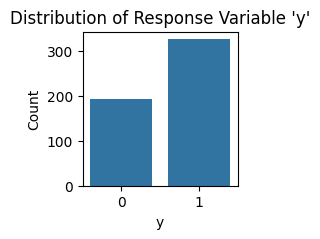

In [ ]:
plt.figure(figsize=(2, 2))
sns.countplot(data=train_data, x='y')
plt.title("Distribution of Response Variable 'y'")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()


In [ ]:
# Checking for missing values in the dataset
missing_values = train_data.isnull().sum()

# Checking for any obvious anomalies in the data (like negative values where they shouldn't be, etc.)
data_description = train_data.describe()

#missing_values,
data_description

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,14.136308,19.289788,92.056590,655.784971,0.096643,0.105092,0.089358,0.049336,0.181396,0.062816,...,25.680424,107.405087,883.494798,0.132785,0.255156,0.272763,0.115322,0.290627,0.083801,0.628131
std,3.532462,4.291286,24.400169,354.378679,0.014144,0.053194,0.080382,0.039078,0.027500,0.007038,...,6.159791,33.982162,577.725772,0.022997,0.156876,0.208610,0.066022,0.062455,0.017924,0.483770
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.675000,16.175000,75.015000,418.500000,0.086580,0.066015,0.029805,0.020450,0.162100,0.057885,...,21.090000,84.095000,515.550000,0.116600,0.147750,0.116550,0.064955,0.250300,0.071270,0.000000
50%,13.300000,18.830000,86.100000,546.100000,0.096390,0.094530,0.061810,0.033900,0.179200,0.061610,...,25.400000,97.330000,677.900000,0.132300,0.215600,0.229800,0.100100,0.282600,0.080060,1.000000
75%,15.815000,21.750000,104.500000,785.600000,0.105400,0.130400,0.131300,0.074855,0.195700,0.066070,...,29.615000,126.500000,1091.500000,0.146400,0.339500,0.378950,0.161950,0.318150,0.091860,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


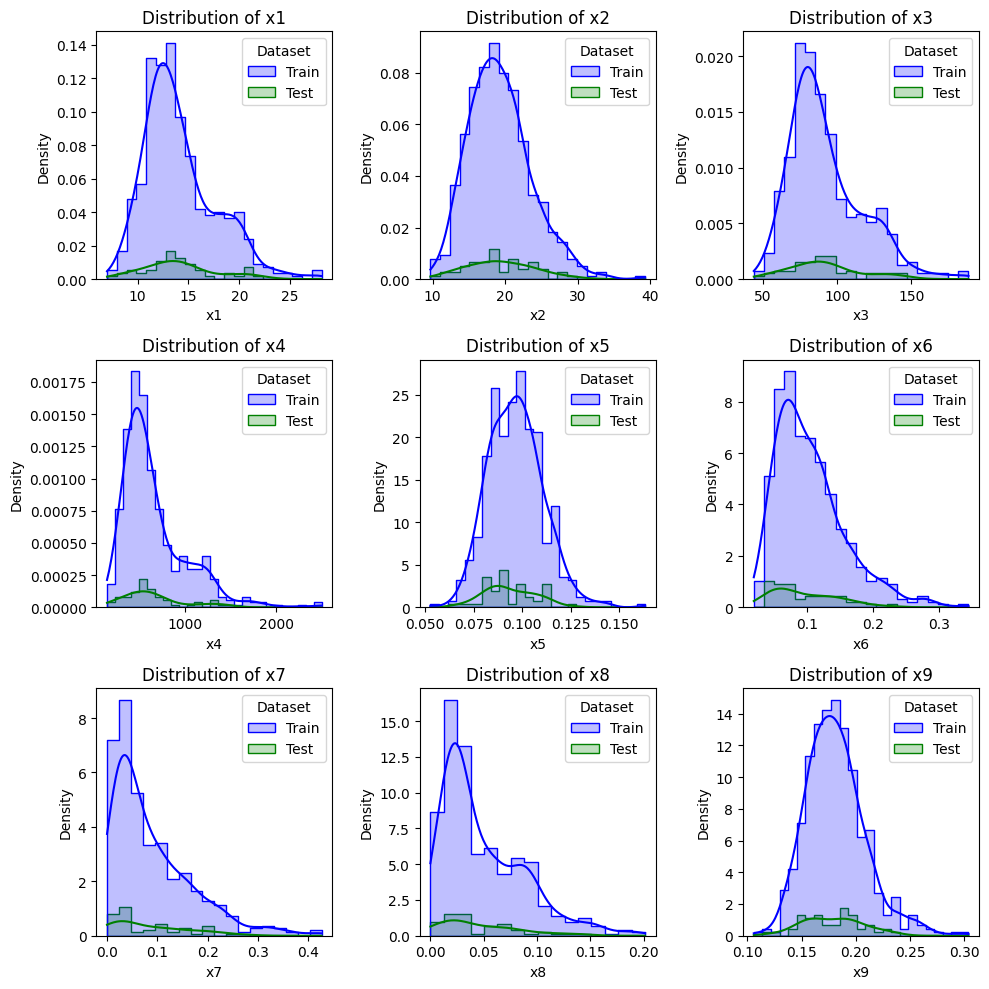

In [ ]:
selected_predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

# Plotting simpler distributions of the selected predictors with the test data included
plt.figure(figsize=(10, 10))

# Creating a modified dataset for visualization where the test data is distinguished
combined_data_simple = pd.concat([train_data.drop('y', axis=1), test_data.drop('y', axis=1)], ignore_index=True)
combined_data_simple['Dataset'] = ['Train'] * len(train_data) + ['Test'] * len(test_data)

for i, col in enumerate(selected_predictors, 1):
    plt.subplot(3, 3, i)
    sns.histplot(combined_data_simple, x=col, hue='Dataset', element="step", kde=True, palette=['blue', 'green'], stat="density")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
combined_data_simple

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,Dataset
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,Train
1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,Train
2,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,Train
3,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,Train
4,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115,Test
565,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,0.1722,0.06724,...,17.04,58.36,259.2,0.1162,0.07057,0.00000,0.00000,0.2592,0.07848,Test
566,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,...,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,Test
567,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,Test


In [ ]:
combined_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
2,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
3,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
4,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115,Missing
565,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,0.1722,0.06724,...,17.04,58.36,259.2,0.1162,0.07057,0.00000,0.00000,0.2592,0.07848,Missing
566,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,...,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,Missing
567,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,Missing


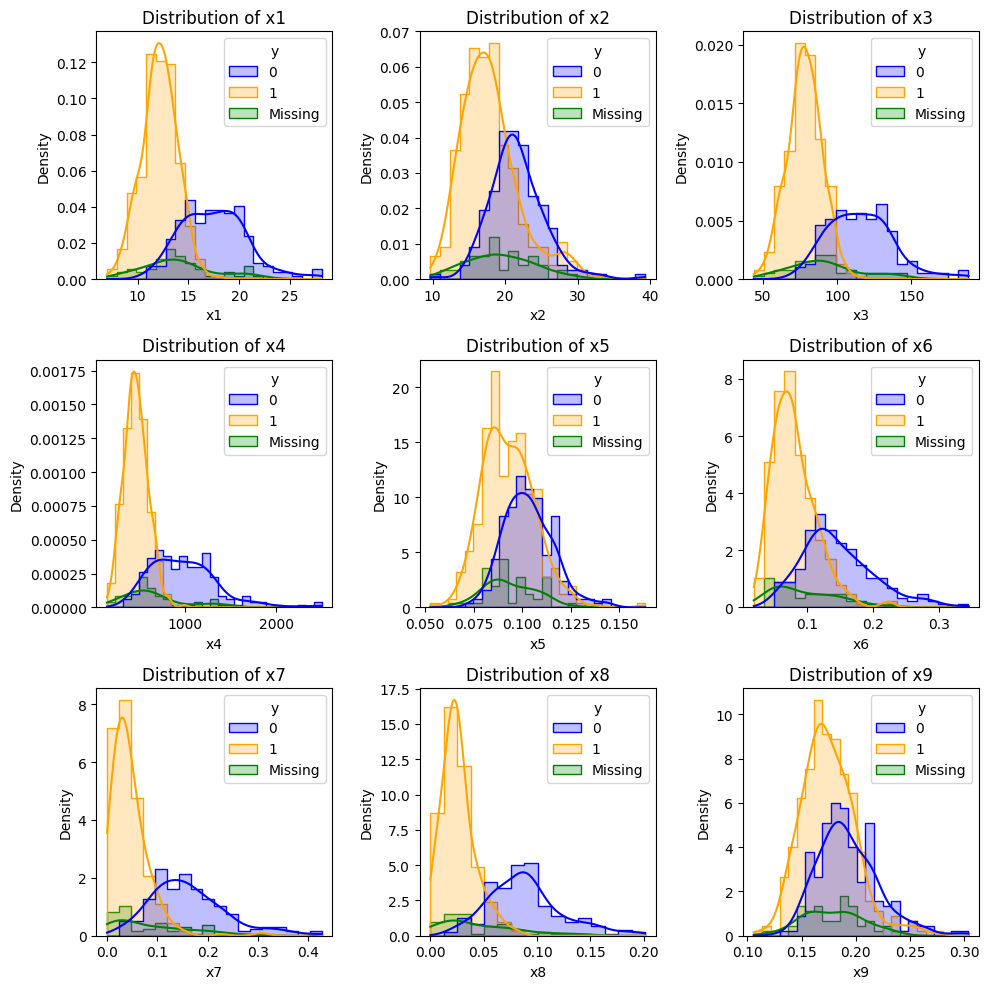

In [ ]:
test_data['y'] = 'Missing'

combined_data = pd.concat([train_data, test_data], ignore_index=True)

plt.figure(figsize=(10, 10))

for i, col in enumerate(selected_predictors, 1):
    plt.subplot(3, 3, i)
    sns.histplot(combined_data, x=col, hue='y', element="step", kde=True, palette=['blue', 'orange', 'green'], stat="density")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
corr_matrix

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
x1,1.000000,0.328026,0.997867,0.987289,0.170586,0.520760,0.683975,0.827978,0.147589,-0.298897,...,0.969846,0.295430,0.966395,0.941315,0.127801,0.431526,0.535222,0.746232,0.179693,0.016892
x2,0.328026,1.000000,0.333848,0.324648,-0.024475,0.243644,0.305781,0.300651,0.074010,-0.077120,...,0.355444,0.910235,0.359874,0.345779,0.070685,0.279475,0.298150,0.296310,0.098439,0.113760
x3,0.997867,0.333848,1.000000,0.986498,0.206821,0.570645,0.722593,0.855864,0.182836,-0.248957,...,0.969537,0.301586,0.971225,0.941551,0.158346,0.472606,0.571150,0.772537,0.204097,0.060437
x4,0.987289,0.324648,0.986498,1.000000,0.178731,0.512983,0.692356,0.827729,0.150704,-0.270463,...,0.962749,0.286431,0.960253,0.959223,0.133296,0.408699,0.520625,0.723658,0.158184,0.013552
x5,0.170586,-0.024475,0.206821,0.178731,1.000000,0.657008,0.513576,0.546025,0.551833,0.594206,...,0.211107,0.036863,0.235902,0.206257,0.806049,0.469026,0.424949,0.496739,0.384845,0.505980
x6,0.520760,0.243644,0.570645,0.512983,0.657008,1.000000,0.884131,0.838006,0.599644,0.562255,...,0.546761,0.252354,0.598830,0.520380,0.569329,0.866528,0.813926,0.817340,0.511070,0.689689
x7,0.683975,0.305781,0.722593,0.692356,0.513576,0.884131,1.000000,0.920823,0.497358,0.336334,...,0.692903,0.304215,0.732592,0.679782,0.452087,0.760836,0.885687,0.860311,0.417202,0.519644
x8,0.827978,0.300651,0.855864,0.827729,0.546025,0.838006,0.920823,1.000000,0.461145,0.170691,...,0.834320,0.299525,0.859454,0.812806,0.457233,0.679938,0.753827,0.910296,0.386749,0.375755
x9,0.147589,0.074010,0.182836,0.150704,0.551833,0.599644,0.497358,0.461145,1.000000,0.480996,...,0.181984,0.091882,0.214780,0.173644,0.424209,0.470794,0.425918,0.428356,0.696315,0.442949
x10,-0.298897,-0.077120,-0.248957,-0.270463,0.594206,0.562255,0.336334,0.170691,0.480996,1.000000,...,-0.244303,-0.048030,-0.198969,-0.222909,0.512750,0.451136,0.340438,0.177356,0.323494,0.769659


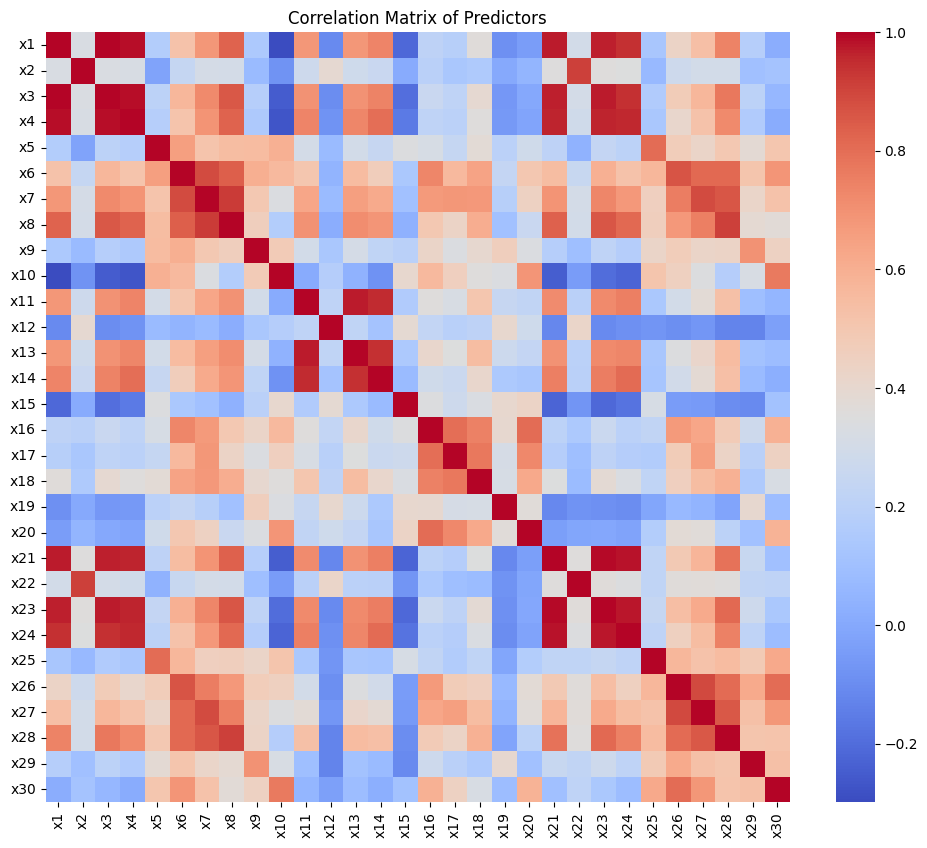

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = train_data.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Predictors")
plt.show()


In [ ]:
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

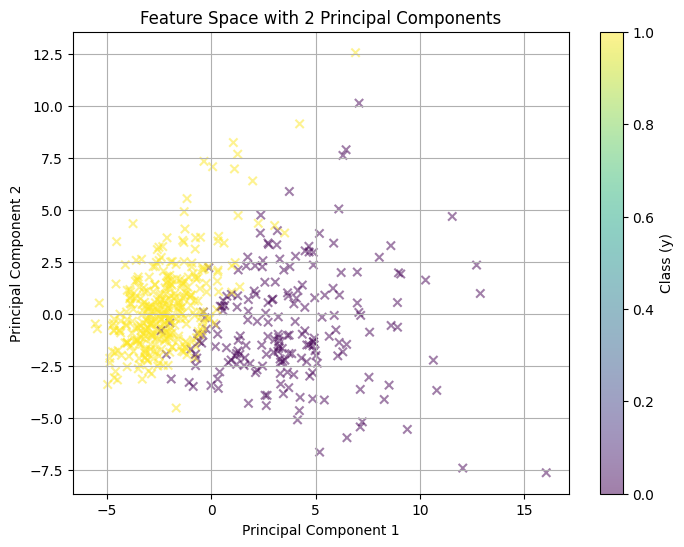

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca_2 = PCA(n_components=2)
X_train_pca_2_fitted = pca_2.fit_transform(X_train_scaled)
X_train_pca_2 = pca_2.transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], marker='x', c=y_train, cmap='viridis', alpha=0.5)
plt.title('Feature Space with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (y)')
plt.grid(True)
plt.show()

In [ ]:
df_pca_2

,PC1,PC2,y
0,9.087144,1.925230,0
1,5.656260,-1.070436,0
2,7.087033,10.145270,0
3,3.856290,-1.907819,0
4,2.349846,3.894682,0
...,...,...,...
514,8.626132,-0.551346,0
515,3.713001,-3.543314,0
516,1.206568,-1.897033,0
517,10.279486,1.632656,0


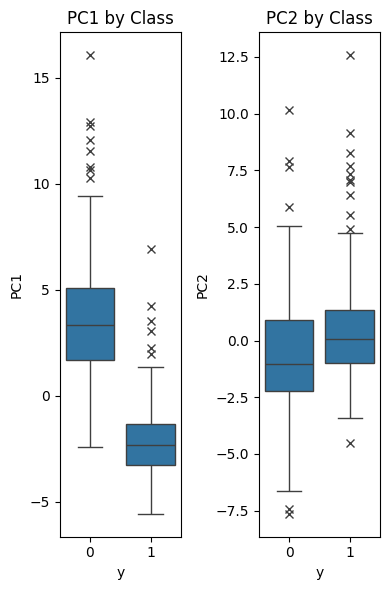

In [ ]:
df_pca_2 = pd.DataFrame(X_train_pca_2, columns=['PC1', 'PC2'])
df_pca_2['y'] = y_train.values

plt.figure(figsize=(4, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='PC1', data=df_pca_2, flierprops={"marker": "x"})
plt.title('PC1 by Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='y', y='PC2', data=df_pca_2, flierprops={"marker": "x"})
plt.title('PC2 by Class')

plt.tight_layout()
plt.show()


In [ ]:
num_features

30

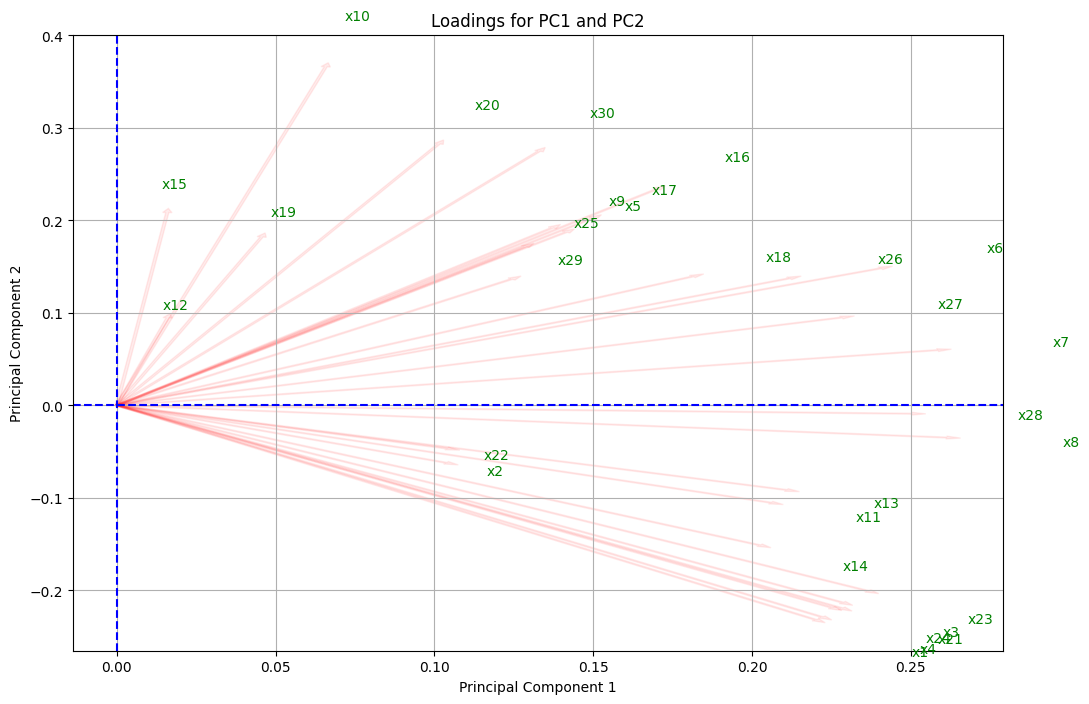

In [ ]:
loadings = pca_2.components_.T
num_features = loadings.shape[0]

plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.075)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, X_train.columns[i], color='g', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Loadings for PC1 and PC2')
plt.axhline(0, color='b', linestyle='--')
plt.axvline(0, color='b', linestyle='--')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA() #Principal component analysis
X_train_pca = pca.fit_transform(X_train_scaled)

variance = pca.explained_variance_ratio_

cumulative_variance = variance.cumsum()

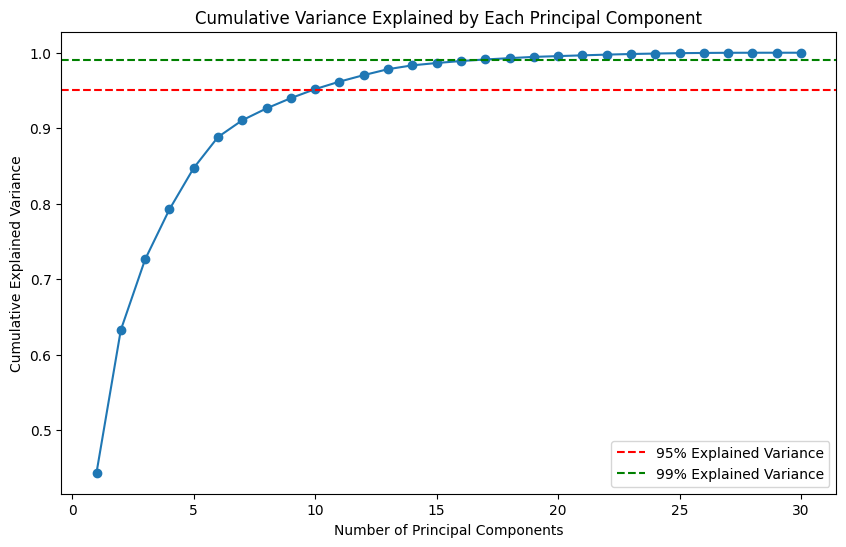

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by Each Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Explained Variance')
plt.legend()
plt.show()


In [ ]:
pca_9 = PCA(n_components=9)
X_train_pca_9_fitted = pca_9.fit(X_train_scaled)
X_train_pca_9 = X_train_pca_9_fitted.transform(X_train_scaled)

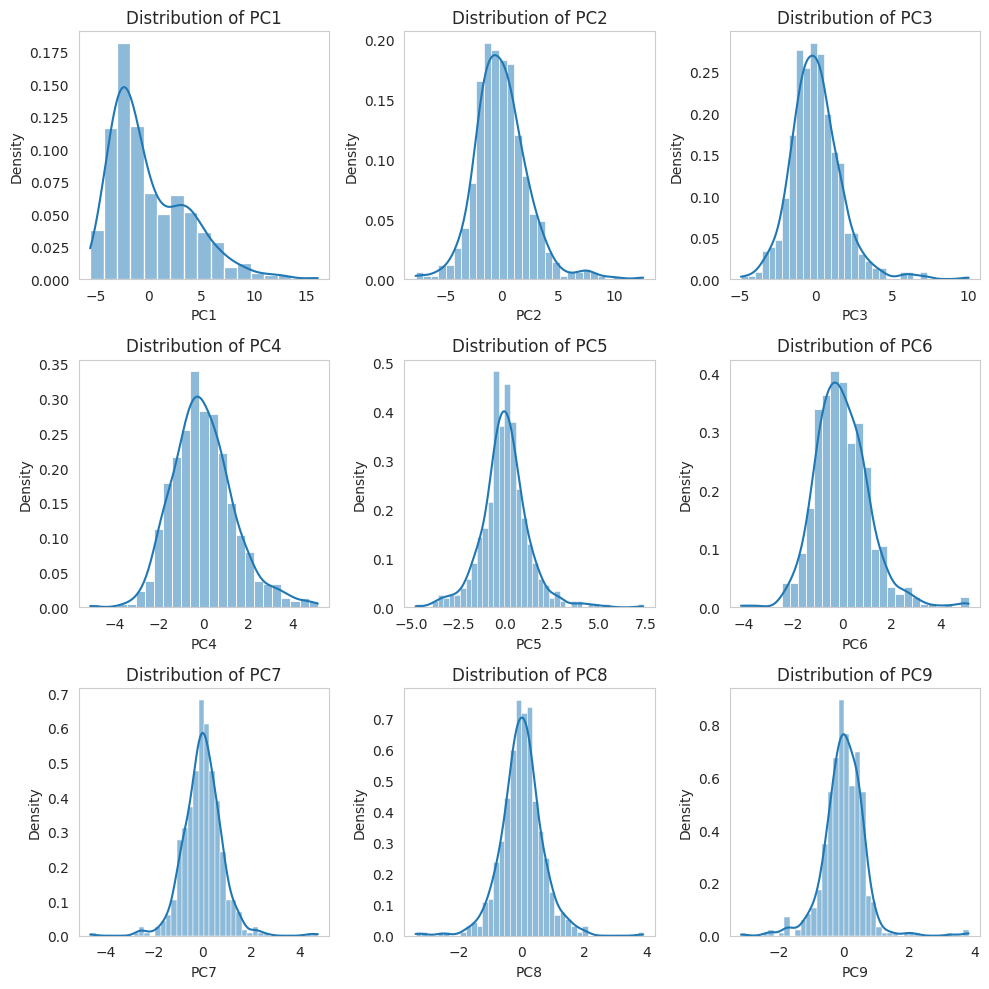

In [ ]:
import matplotlib.gridspec as gridspec

pc_names = ["PC" + str(i) for i in range(1, 10)]
pc_9_df = pd.DataFrame(data=X_train_pca_9, columns=pc_names)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

num_cols = 3
num_rows = (len(pc_names) + num_cols - 1) // num_cols

gs = gridspec.GridSpec(num_rows, num_cols)

for i, col in enumerate(pc_names, 1):
    plt.subplot(gs[i - 1])
    plt.grid(False)
    sns.histplot(pc_9_df[col], kde=True, stat="density")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

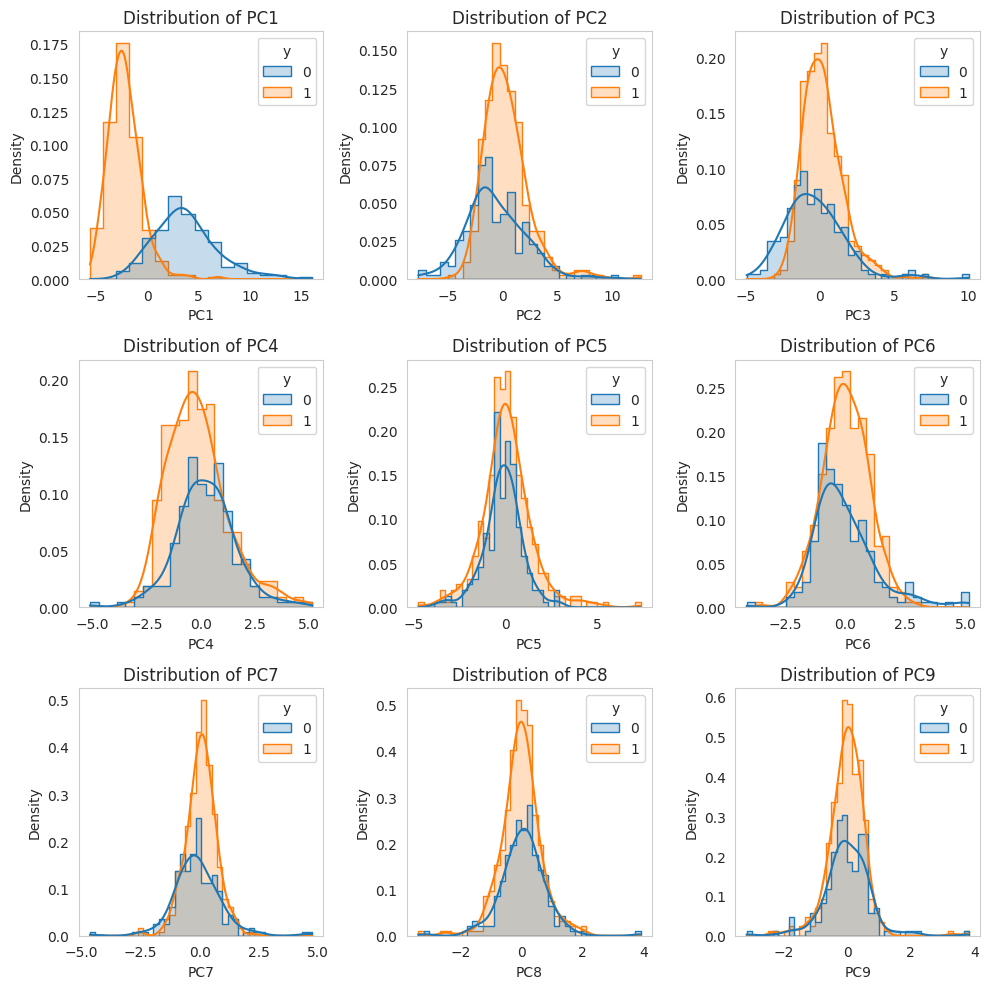

In [ ]:
pc_9_df = pd.DataFrame(data=X_train_pca_9, columns=pc_names)
pc_9_df['y'] = train_data.y.reset_index(drop=True)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

num_cols = 3
num_rows = (len(pc_names) + num_cols - 1) // num_cols

gs = gridspec.GridSpec(num_rows, num_cols)

for i, col in enumerate(pc_names):
    plt.subplot(gs[i])
    plt.grid(False)
    sns.histplot(pc_9_df, x=col, hue='y', element="step", kde=True, stat="density")  # Coloring by 'y'
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Model Experiment

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import numpy as np


In [ ]:
knn = KNeighborsClassifier()
k_values = np.linspace(1, 30, 30, dtype=int)

param_grid = {'n_neighbors': k_values}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_pca_9, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'n_neighbors': 14}, 0.9652714932126697)

In [ ]:
svm = SVC()
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=10, scoring='accuracy')
grid_search_svm.fit(X_train_pca_9, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_params_svm, best_score_svm


({'kernel': 'linear'}, 0.9787707390648567)

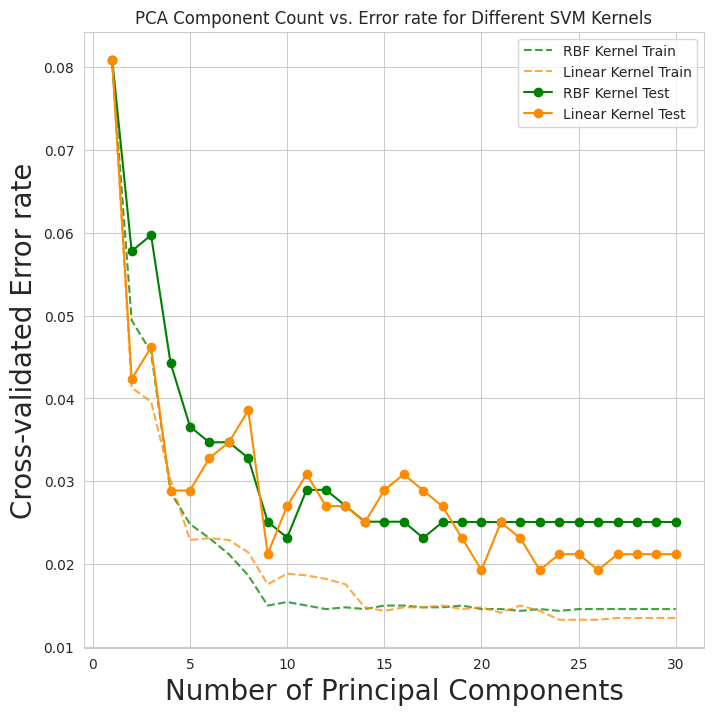

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Common parameter grid for PCA
param_grid = {
    'pca__n_components': range(1, min(X_train_scaled.shape) + 1)
}

# SVM with RBF kernel
pipeline_rbf = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='rbf'))
])
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid, cv=10, n_jobs=-1, return_train_score=True)
grid_search_rbf.fit(X_train_scaled, y_train)

# SVM with Linear kernel
pipeline_linear = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='linear'))
])
grid_search_linear = GridSearchCV(pipeline_linear, param_grid, cv=10, n_jobs=-1, return_train_score=True)
grid_search_linear.fit(X_train_scaled, y_train)

# Plotting the results
plt_fig, ax = plt.subplots(figsize=(8, 8))
n_comp = param_grid['pca__n_components']

# RBF Kernel - Test Scores
cv_scores_rbf = 1-grid_search_rbf.cv_results_['mean_test_score']
cv_se_rbf = grid_search_rbf.cv_results_['std_test_score'] / np.sqrt(10)
ax.errorbar(n_comp, cv_scores_rbf, fmt='-o', color='g', label='RBF Kernel Test')

# RBF Kernel - Training Scores
train_scores_rbf = 1-grid_search_rbf.cv_results_['mean_train_score']
ax.plot(n_comp, train_scores_rbf, '--', color='g', label='RBF Kernel Train', alpha=0.75)

# Linear Kernel - Test Scores
cv_scores_linear = 1-grid_search_linear.cv_results_['mean_test_score']
cv_se_linear = grid_search_linear.cv_results_['std_test_score'] / np.sqrt(10)
ax.errorbar(n_comp, cv_scores_linear, fmt='-o', color='darkorange', label='Linear Kernel Test')

# Linear Kernel - Training Scores
train_scores_linear = 1-grid_search_linear.cv_results_['mean_train_score']
ax.plot(n_comp, train_scores_linear, '--', color='darkorange', label='Linear Kernel Train', alpha=0.75)

ax.set_ylabel('Cross-validated Error rate', fontsize=20)
ax.set_xlabel('Number of Principal Components', fontsize=20)
plt.title('PCA Component Count vs. Error rate for Different SVM Kernels')
ax.legend()
plt.show()


In [ ]:
print('hello')

hello


In [ ]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

param_grid = {
    'pca__n_components': list(range(9, 11)),
    'svm__gamma': np.logspace(-2, -1, 30),
    'svm__C': np.logspace(0, 1, 30),
    'svm__kernel': ['rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params_rbf = grid_search.best_params_
best_score_rbf = grid_search.best_score_

print("Best parameters:", best_params_rbf)
print("Best cross-validation score:", best_score_rbf)


Best parameters: {'pca__n_components': 9, 'svm__C': 7.880462815669913, 'svm__gamma': 0.01268961003167922, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.986500754147813


We observed that using rbf kernel, SVM only work well with around 9 or 10 number of pc. However, we doesn't sure which can perform the best with possible gamma and cost. So here perfrom gird search with only 9 and 10 number of pc, with possible gamma and cost.

In [ ]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

param_grid = {
    'pca__n_components': list(range(1, 3)),
    'svm__gamma': ['auto'],
    'svm__C': np.logspace(-1, 1, 50),
    'svm__kernel': ['linear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params_lin = grid_search.best_params_
best_score_lin = grid_search.best_score_

print("Best parameters:", best_params_lin)
print("Best cross-validation score:", best_score_lin)


Best parameters: {'pca__n_components': 2, 'svm__C': 0.372759372031494, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}
Best cross-validation score: 0.957654600301659


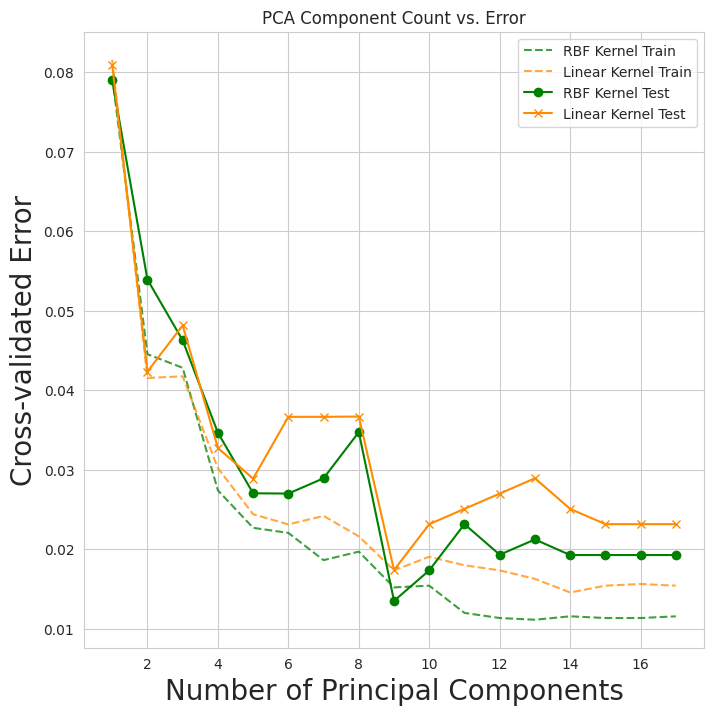

In [ ]:
param_grid = {
    'pca__n_components': range(1, 18)
}

# RBF kernel
best_C_rbf = best_params_rbf['svm__C']
best_gamma_rbf = best_params_rbf['svm__gamma']

pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='rbf', gamma=best_gamma_rbf, C=best_C_rbf))
])

grid_search_rbf = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, return_train_score=True)
grid_search_rbf.fit(X_train_scaled, y_train)

# Linear kernel
best_C_lin = best_params_lin['svm__C']
best_gamma_lin = best_params_lin['svm__gamma']

pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='linear', gamma=best_gamma_lin, C=best_C_lin))
])

grid_search_lin = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, return_train_score=True)
grid_search_lin.fit(X_train_scaled, y_train)


plt_fig, ax = plt.subplots(figsize=(8, 8))
n_comp = param_grid['pca__n_components']
cv_scores_rbf = 1-grid_search_rbf.cv_results_['mean_test_score']
cv_se_rbf = grid_search_rbf.cv_results_['std_test_score'] / np.sqrt(10)
cv_scores_lin = 1-grid_search_lin.cv_results_['mean_test_score']
cv_se_lin = grid_search_lin.cv_results_['std_test_score'] / np.sqrt(10)
train_scores_rbf = 1-grid_search_rbf.cv_results_['mean_train_score']
train_scores_lin = 1-grid_search_lin.cv_results_['mean_train_score']

ax.errorbar(n_comp, cv_scores_rbf, color='g', label='RBF Kernel Test', fmt='-o')
ax.plot(n_comp, train_scores_rbf, '--', color='g', label='RBF Kernel Train', alpha=0.75)
ax.errorbar(n_comp, cv_scores_lin, color='darkorange', label='Linear Kernel Test', fmt='-x')
ax.plot(n_comp, train_scores_lin, '--', color='darkorange', label='Linear Kernel Train', alpha=0.75)
ax.set_ylabel('Cross-validated Error', fontsize=20)
ax.set_xlabel('Number of Principal Components', fontsize=20)
plt.title('PCA Component Count vs. Error')
ax.legend()
plt.show()

In [ ]:
model = SVC(kernel='rbf', gamma=0.012648552168552958, C=7.543120063354617)

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel='rbf', gamma=best_gamma_rbf, C=best_C_rbf)

n_iterations = 1000
scores = np.zeros(n_iterations)

for i in range(n_iterations):
    X_sample, y_sample = resample(X_train_pca_9, y_train)

    model.fit(X_sample, y_sample)

    predictions = model.predict(X_train_pca_9)
    scores[i] = accuracy_score(y_train, predictions)

# Analyze the results
mean_score = np.mean(scores)
score_variance = np.var(scores)
confidence_interval = np.percentile(scores, [2.5, 97.5])

print(f"Mean Score: {mean_score}")
print(f"Variance: {score_variance}")
print(f"95% Confidence Interval: {confidence_interval}")


Mean Score: 0.9803815028901733
Variance: 1.605605859794098e-05
95% Confidence Interval: [0.97109827 0.98651252]


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel='linear', C=best_C_lin, gamma='auto')

n_iterations = 1000
scores = np.zeros(n_iterations)

for i in range(n_iterations):
    # Create a bootstrap sample
    X_sample, y_sample = resample(X_train_pca_9, y_train)

    # Fit the model
    model.fit(X_sample, y_sample)

    # Evaluate the model
    predictions = model.predict(X_train_pca_9)
    scores[i] = accuracy_score(y_train, predictions)

# Analyze the results
mean_score = np.mean(scores)
score_variance = np.var(scores)
confidence_interval = np.percentile(scores, [2.5, 97.5])

print(f"Mean Score: {mean_score}")
print(f"Variance: {score_variance}")
print(f"95% Confidence Interval: {confidence_interval}")


Mean Score: 0.9785606936416185
Variance: 1.2202475488285233e-05
95% Confidence Interval: [0.97109827 0.98458574]


## Perdicting

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', X_train_pca_9_fitted),
    ('svm', SVC(kernel='rbf', gamma=best_gamma_rbf, C=best_C_rbf))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('svm', SVC(C=7.880462815669913, gamma=0.01268961003167922))])

In [ ]:
predictions = pipeline.predict(test_data.drop('y', axis=1))

In [ ]:
print(predictions)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [ ]:
test_data['y'] = predictions

In [ ]:
test_data.to_csv('.csv')

In [ ]:
svm_model = pipeline.named_steps['svm']

support_vectors = svm_model.support_vectors_

dual_coefficients = svm_model.dual_coef_

print("Support Vectors:\n", support_vectors)
print("\nDual Coefficients:\n", dual_coefficients)

Support Vectors:
 [[ 2.34984605e+00  3.89468221e+00 -2.97045548e+00 -8.88216796e-01
  -1.04485197e+00 -4.36339036e-01  5.80606953e-01 -8.35349678e-02
  -8.69149332e-02]
 [ 3.01881141e-01 -9.66319999e-01  1.69956940e+00  5.68725403e-01
   5.30953639e-01  1.03548741e+00 -1.91597959e+00  8.50450941e-01
   2.76326188e-01]
 [ 1.66225540e+00 -1.51454646e+00  1.50992701e-01 -1.90754550e+00
   5.25229530e-01  6.55298307e-03  2.06444555e-01 -1.95188636e-01
  -4.09581646e-01]
 [ 7.42206151e-01  8.54017595e-01 -2.69854035e+00  2.84717447e-01
   8.35401117e-01 -1.01183942e+00 -1.51344784e-01  1.35704742e-01
   4.64050675e-01]
 [-2.16610366e+00 -1.94227520e+00 -1.13390718e+00  1.09833508e+00
   5.01093018e-01  9.27086811e-01  6.03497902e-02 -1.17695805e-01
   6.28963322e-01]
 [-1.17606162e-01  2.22562726e+00 -1.92065099e+00  1.50669384e+00
  -1.66020093e+00 -2.05452010e+00 -4.48230478e-01 -5.79051584e-01
   8.62342737e-01]
 [-3.81443212e-01  1.00388593e-01 -2.02384494e+00 -1.04613419e+00
   7.36538

In [ ]:
type(support_vectors)

numpy.ndarray

In [ ]:
# Find the closest points in the transformed dataset to the support vectors
indices = []
for sv in support_vectors:
    distances = np.linalg.norm(X_train_pca_9 - sv, axis=1)
    closest_index = np.argmin(distances)
    indices.append(closest_index)

In [ ]:
original_support_vectors = train_data.iloc[indices]

In [ ]:
pc1_pc2_support_vectors = support_vectors[:, :2]

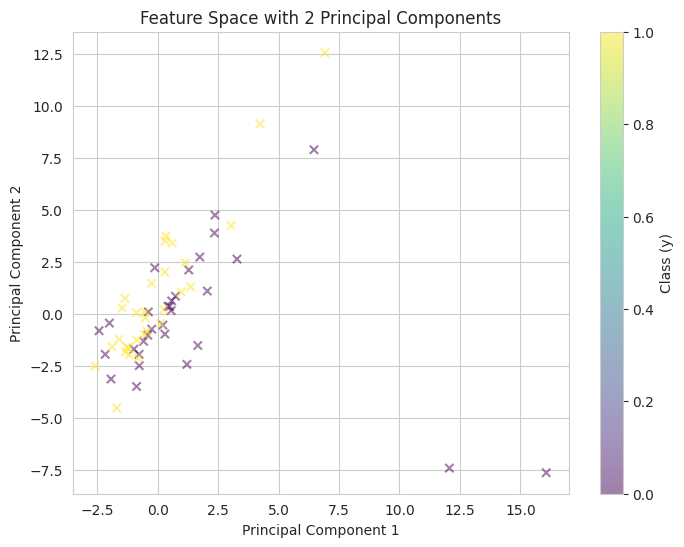

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pc1_pc2_support_vectors[:, 0], pc1_pc2_support_vectors[:, 1], marker='x', c=original_support_vectors.y, cmap='viridis', alpha=0.5)
plt.title('Feature Space with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (y)')
plt.grid(True)
plt.show()

In [ ]:
pipeline_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC(kernel='linear', gamma=best_gamma_lin, C=best_C_lin))
])

pipeline_lin.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svm',
                 SVC(C=0.372759372031494, gamma='auto', kernel='linear'))])

In [ ]:
svm_model_lin = pipeline_lin.named_steps['svm']
support_vectors_lin = svm_model_lin.support_vectors_
dual_coefficients_lin = svm_model_lin.dual_coef_

In [ ]:
# Find the closest points in the transformed dataset to the support vectors
indices = []
for sv in support_vectors_lin:
    distances = np.linalg.norm(X_train_pca_2 - sv, axis=1)
    closest_index = np.argmin(distances)
    indices.append(closest_index)

In [ ]:
original_support_vectors = train_data.iloc[indices]

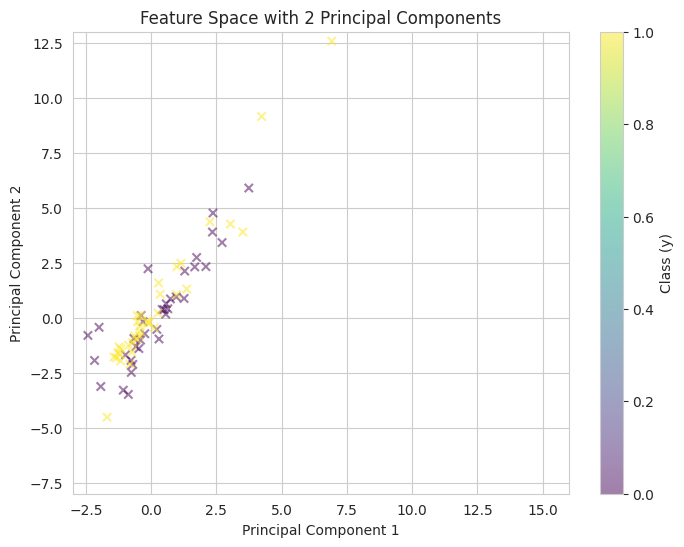

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(support_vectors_lin[:, 0], support_vectors_lin[:, 1], marker='x', c=original_support_vectors.y, cmap='viridis', alpha=0.5)
plt.title('Feature Space with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.ylim(-8, 13)
plt.xlim(-3, 16)
plt.colorbar(label='Class (y)')
plt.grid(True)
plt.show()

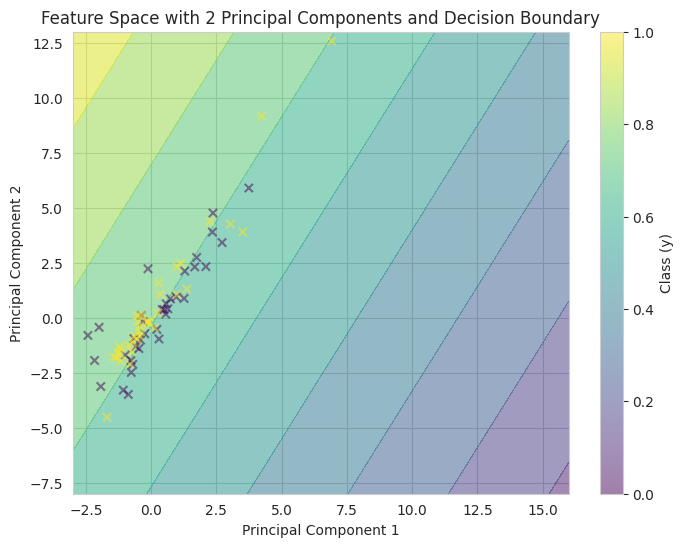

In [ ]:
# Create a grid of points in the space of PC1 and PC2
x_min, x_max = support_vectors_lin[:, 0].min() - 1, support_vectors_lin[:, 0].max() + 1
y_min, y_max = support_vectors_lin[:, 1].min() - 1, support_vectors_lin[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(-3, 16, 500), np.linspace(-8, 13, 500))

pipeline_lin_v = Pipeline([
    ('svm', SVC(kernel='linear', gamma=best_gamma_lin, C=best_C_lin))
])

pipeline_lin_v.fit(X_train_pca_2, y_train)

# Predict using the SVM on this grid
Z = pipeline_lin_v.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Reshape the result to match the grid
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.scatter(support_vectors_lin[:, 0], support_vectors_lin[:, 1], marker='x', c=y_train[pipeline_lin_v.named_steps['svm'].support_], cmap='viridis', alpha=0.5)
plt.title('Feature Space with 2 Principal Components and Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (y)')
plt.grid(True)
plt.show()

In [ ]:
transformed_data_point = pipeline.named_steps['scaler'].transform(test_data.drop('y', axis=1))
transformed_data_point = pipeline.named_steps['pca'].transform(transformed_data_point)
distance = pipeline.named_steps['svm'].decision_function(transformed_data_point)

In [ ]:
distance

array([-1.91886222,  0.98067306,  2.37187202,  1.40371983,  3.4259999 ,
        2.06404803,  3.83758073,  2.64541071,  3.46005403,  3.82569234,
        0.87043973,  1.06805434,  4.09920003,  0.29211494,  0.61198332,
       -0.98080935,  2.14581533, -4.04868362, -3.51897777, -4.66971131,
       -1.70221806, -1.42325649,  2.03900121,  2.47920589, -1.95490256,
        2.52055887,  2.98013957, -1.39472068,  2.00356945, -4.77367286,
        3.16550356, -2.86088915,  0.50467393, -2.53703166,  3.59698091,
       -2.42420831,  1.56401986, -2.55835977,  1.64270895, -2.74980459,
       -0.76667506,  3.56410369, -0.61900861,  3.17765545,  1.23372824,
       -4.34699313,  3.93874515,  1.52252058,  2.88848815, -3.11646114])

In [ ]:
absolute_distance = np.abs(np.array(distance))
smallest_distance = np.partition(absolute_distance, 10)[:10]
sorted_smallest_absolute_distance = np.sort(smallest_distance)
indices_of_smallest = np.argpartition(absolute_distance, 10)[:10]
sorted_indices = indices_of_smallest[np.argsort(absolute_distance[indices_of_smallest])]
sorted_indices, sorted_smallest_absolute_distance


(array([13, 32, 14, 42, 40, 10,  1, 15, 11, 44]),
 array([0.29211494, 0.50467393, 0.61198332, 0.61900861, 0.76667506,
        0.87043973, 0.98067306, 0.98080935, 1.06805434, 1.23372824]))